In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
df=pd.read_csv('C:/Users/Dell/Desktop/Python data sets/chennai_house_price_prediction.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [3]:
df.shape

(7109, 19)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [5]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [6]:
df.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [7]:
check=pd.DataFrame(columns=['Unique count','d types'],index=df.columns)

In [8]:
check['Unique count']=df.nunique()

In [9]:
check['d types']=df.dtypes

In [10]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [11]:
check['null count']=df.isnull().sum()

In [12]:
check

,Unique count,d types,null count
PRT_ID,7109,object,0
AREA,17,object,0
INT_SQFT,1699,int64,0
DIST_MAINROAD,201,int64,0
N_BEDROOM,4,float64,1
N_BATHROOM,2,float64,5
N_ROOM,5,int64,0
SALE_COND,9,object,0
PARK_FACIL,3,object,0
BUILDTYPE,5,object,0


# UNIVARIATE ANALYSIS 
## 1-> Continuous Variable.

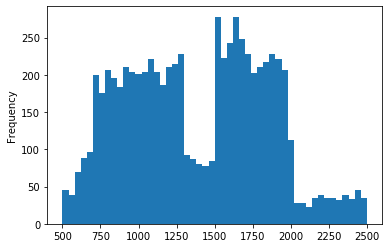

In [13]:
df['INT_SQFT'].plot.hist(bins=50)

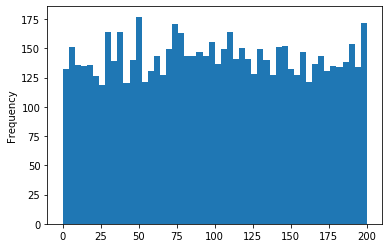

In [14]:
df['DIST_MAINROAD'].plot.hist(bins=50)

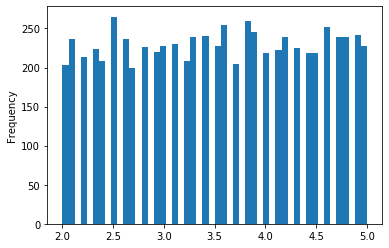

In [15]:
df['QS_ROOMS'].plot.hist(bins=50)

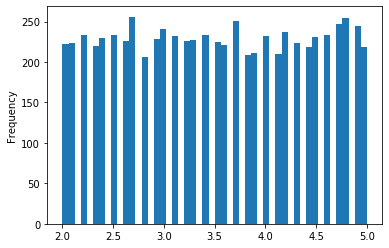

In [16]:
df['QS_BATHROOM'].plot.hist(bins=50)

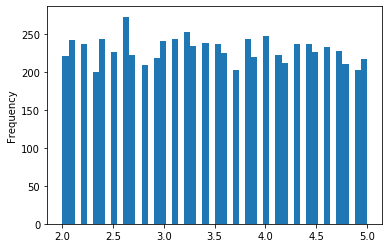

In [17]:
df['QS_BEDROOM'].plot.hist(bins=50)

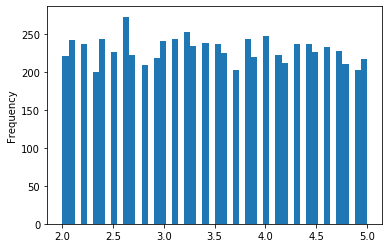

In [18]:
df['QS_BEDROOM'].plot.hist(bins=50)

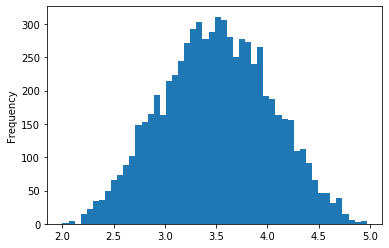

In [19]:
df['QS_OVERALL'].plot.hist(bins=50)

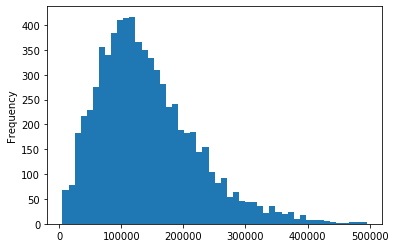

In [20]:
df['COMMIS'].plot.hist(bins=50)

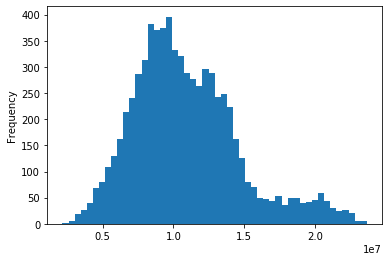

In [21]:
df['SALES_PRICE'].plot.hist(bins=50)

## 2-> Categorical Variable

In [22]:
check

,Unique count,d types,null count
PRT_ID,7109,object,0
AREA,17,object,0
INT_SQFT,1699,int64,0
DIST_MAINROAD,201,int64,0
N_BEDROOM,4,float64,1
N_BATHROOM,2,float64,5
N_ROOM,5,int64,0
SALE_COND,9,object,0
PARK_FACIL,3,object,0
BUILDTYPE,5,object,0


In [23]:
df['AREA'].value_counts()/len(df['AREA'])*100

Chrompet      23.646082
Karapakkam    19.172879
KK Nagar      14.010409
Velachery     13.771276
Anna Nagar    11.014207
Adyar         10.873541
T Nagar        6.977071
Chrompt        0.126600
Chrmpet        0.084400
Chormpet       0.084400
TNagar         0.070333
Ana Nagar      0.042200
Karapakam      0.042200
Ann Nagar      0.028133
Velchery       0.028133
Adyr           0.014067
KKNagar        0.014067
Name: AREA, dtype: float64

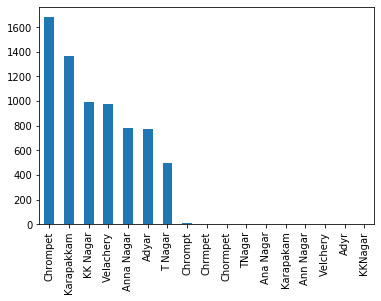

In [24]:
df['AREA'].value_counts().plot.bar()

In [25]:
df['N_BEDROOM'].value_counts()/len(df['N_BEDROOM'])*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

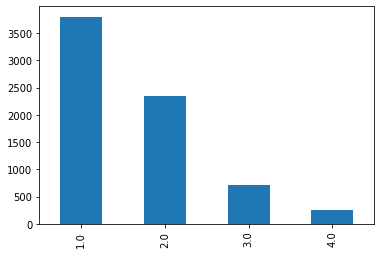

In [26]:
df['N_BEDROOM'].value_counts().plot.bar()

In [27]:
df['N_BATHROOM'].value_counts()/len(df['N_BATHROOM'])*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

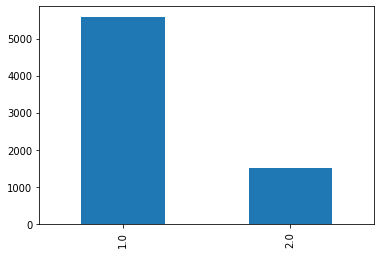

In [28]:
df['N_BATHROOM'].value_counts().plot.bar()

In [29]:
df['N_ROOM'].value_counts()/len(df['N_ROOM'])*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

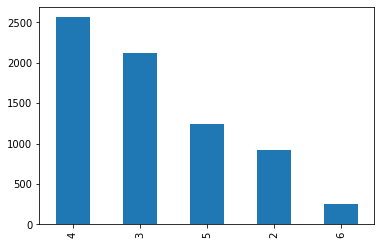

In [30]:
df['N_ROOM'].value_counts().plot.bar()

In [31]:
df['SALE_COND'].value_counts()/len(df['SALE_COND'])*100

AdjLand        20.157547
Partial        20.101280
Normal Sale    20.016880
AbNormal       19.777747
Family         19.735546
Adj Land        0.084400
Ab Normal       0.070333
Partiall        0.042200
PartiaLl        0.014067
Name: SALE_COND, dtype: float64

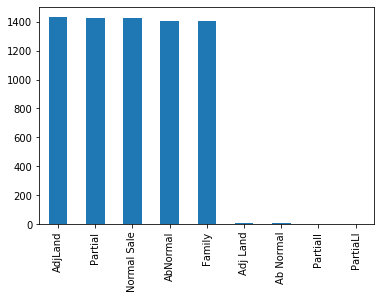

In [32]:
df['SALE_COND'].value_counts().plot.bar()

In [33]:
df['PARK_FACIL'].value_counts()/len(df['PARK_FACIL'])*100

Yes    50.457167
No     49.514700
Noo     0.028133
Name: PARK_FACIL, dtype: float64

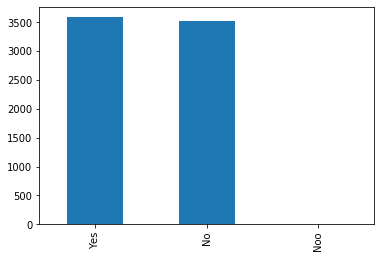

In [34]:
df['PARK_FACIL'].value_counts().plot.bar()

In [35]:
df['BUILDTYPE'].value_counts()/len(df['BUILDTYPE'])*100

House         34.378956
Commercial    32.705022
Others        32.494022
Other          0.365734
Comercial      0.056267
Name: BUILDTYPE, dtype: float64

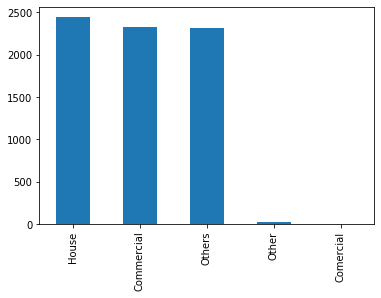

In [36]:
df['BUILDTYPE'].value_counts().plot.bar()

In [37]:
df['UTILITY_AVAIL'].value_counts()/len(df['UTILITY_AVAIL'])*100

AllPub     26.529751
NoSeWa     26.318751
NoSewr     25.727950
ELO        21.409481
All Pub     0.014067
Name: UTILITY_AVAIL, dtype: float64

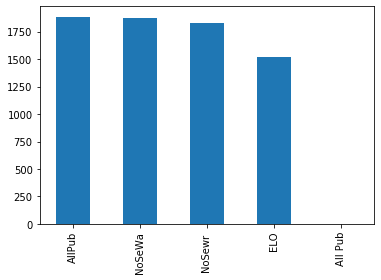

In [38]:
df['UTILITY_AVAIL'].value_counts().plot.bar()

In [39]:
df['STREET'].value_counts()/len(df['STREET'])*100

Paved        36.010691
Gravel       35.448024
No Access    28.274019
Pavd          0.168800
NoAccess      0.098467
Name: STREET, dtype: float64

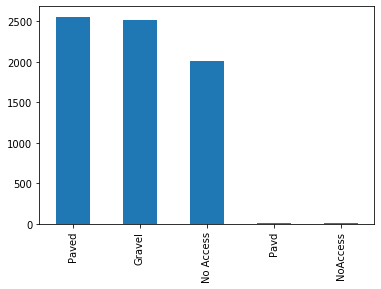

In [40]:
df['STREET'].value_counts().plot.bar()

In [41]:
df['MZZONE'].value_counts()/len(df['MZZONE'])*100

RL    26.135884
RH    25.629484
RM    25.559150
C      7.736672
A      7.553805
I      7.385005
Name: MZZONE, dtype: float64

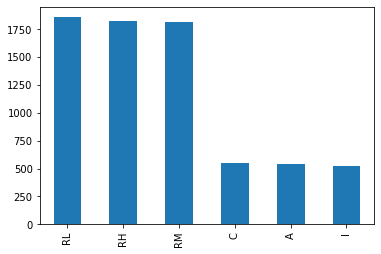

In [42]:
df['MZZONE'].value_counts().plot.bar()

# DATA MANIPULATION 
### 1-> DROP DUPLICATES
### 2-> FILL THE MISSING VALUES
### 3-> CORRECT THE DATA TYPES
### 4-> FIXING SPELLING ERRORS

In [43]:
df.shape

(7109, 19)

In [44]:
df.drop_duplicates().shape

(7109, 19)

In [45]:
df.drop_duplicates(subset='AREA').shape

(17, 19)

MISSING VALUES

In [46]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [47]:
df.dropna(axis=0,how='any').shape

(7056, 19)

In [48]:
df.dropna(axis=1,how='any').shape

(7109, 16)

In [49]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(value=df['N_BEDROOM'].mode()[0])

In [50]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [51]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(value=df['N_BATHROOM'].mode()[0])

In [52]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [53]:
df['QS_OVERALL']=df['QS_OVERALL'].fillna(value=df['QS_OVERALL'].mean())

In [54]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [55]:
check['null count']=df.isnull().sum()

In [56]:
check

,Unique count,d types,null count
PRT_ID,7109,object,0
AREA,17,object,0
INT_SQFT,1699,int64,0
DIST_MAINROAD,201,int64,0
N_BEDROOM,4,float64,0
N_BATHROOM,2,float64,0
N_ROOM,5,int64,0
SALE_COND,9,object,0
PARK_FACIL,3,object,0
BUILDTYPE,5,object,0


In [57]:
df=df.astype({'N_BEDROOM':'object','N_BATHROOM':'object','N_ROOM':'object'})

In [58]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [59]:
temp=['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('-----------------value count in ',i,' -----------------')
    print(df[i].value_counts())
    print(" ")

-----------------value count in  AREA  -----------------
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
 
-----------------value count in  N_BEDROOM  -----------------
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
 
-----------------value count in  N_BATHROOM  -----------------
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64
 
-----------------value count in  N_ROOM  -----------------
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
 
-----------------value count in  SALE_COND  -----------------
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal  

In [60]:
df['SALE_COND'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial'},inplace=True)

In [61]:
df['SALE_COND'].replace({'PartiaLl':'Partial'},inplace=True)

In [62]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)

In [63]:
df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

In [64]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

In [65]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

In [66]:
df['AREA'].replace({'Adyr':'Adyar',
                    'Ann Nagar':'Ana Nagar','Anna Nagar':'Ana Nagar',
                    'Chrmpet':'Chrompet','Chormpet':'Chrompet','Chrompt':'Chrompet',
                   'KK Nagar':'KKNagar',
                    'karapakkam':'karapakam',
                   'T Nagar':'TNagar',
                   'Velachery':'Velchery'},inplace=True)

In [67]:
temp=['N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('-----------------value count in ',i,' -----------------')
    print(df[i].value_counts())
    print(" ")

-----------------value count in  N_BEDROOM  -----------------
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
 
-----------------value count in  N_BATHROOM  -----------------
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64
 
-----------------value count in  N_ROOM  -----------------
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
 
-----------------value count in  SALE_COND  -----------------
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64
 
-----------------value count in  PARK_FACIL  -----------------
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64
 
-----------------value count in  BUILDTYPE  -----------------
House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64
 
-----------------value count in  UTILITY_AVAIL  -----------------
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name:

# BIVARIATE ANALYSIS:

In [68]:
check

,Unique count,d types,null count
PRT_ID,7109,object,0
AREA,17,object,0
INT_SQFT,1699,int64,0
DIST_MAINROAD,201,int64,0
N_BEDROOM,4,float64,0
N_BATHROOM,2,float64,0
N_ROOM,5,int64,0
SALE_COND,9,object,0
PARK_FACIL,3,object,0
BUILDTYPE,5,object,0


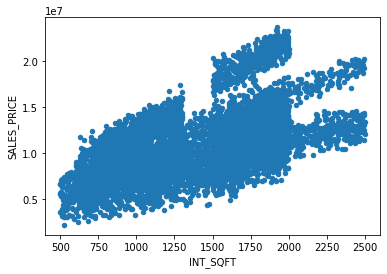

In [69]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

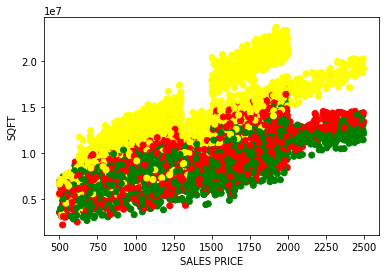

In [70]:
fig,ax=plt.subplots()
colors={'House':'green','Others':'red','Commercial':'yellow'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.xlabel('SALES PRICE')
plt.ylabel('SQFT')
plt.show()

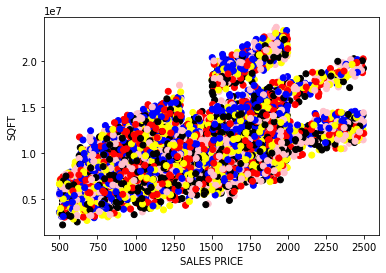

In [71]:
fig,ax=plt.subplots()
colors={'AdjLand':'blue','AbNormal':'red','Partial':'black','Normal Sale':'pink','Family':'yellow'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['SALE_COND'].apply(lambda x: colors[x]))
plt.xlabel('SALES PRICE')
plt.ylabel('SQFT')
plt.show()

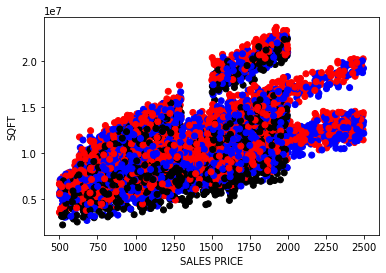

In [72]:
fig,ax=plt.subplots()
colors={'Paved':'blue','Gravel':'red','No Access':'black'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['STREET'].apply(lambda x: colors[x]))
plt.xlabel('SALES PRICE')
plt.ylabel('SQFT')
plt.show()

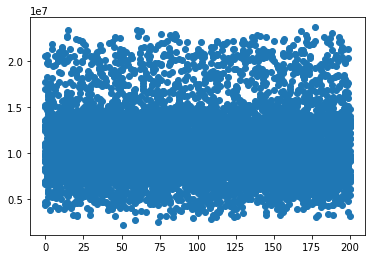

In [73]:
plt.scatter(df['DIST_MAINROAD'],df['SALES_PRICE'])

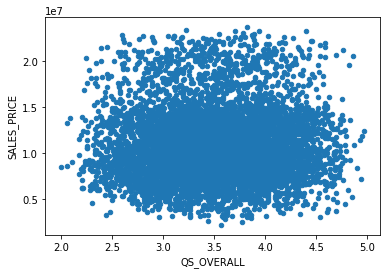

In [74]:
df.plot.scatter('QS_OVERALL','SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL VS SALES_PRICE')

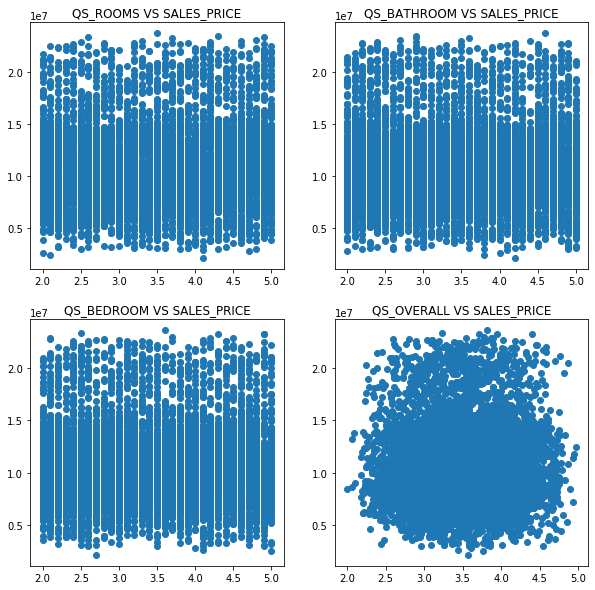

In [75]:
fig,axs=plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)
axs[0,0].scatter(df['QS_ROOMS'],df['SALES_PRICE'])
axs[0,0].set_title('QS_ROOMS VS SALES_PRICE')

axs[0,1].scatter(df['QS_BATHROOM'],df['SALES_PRICE'])
axs[0,1].set_title('QS_BATHROOM VS SALES_PRICE')

axs[1,0].scatter(df['QS_BEDROOM'],df['SALES_PRICE'])
axs[1,0].set_title('QS_BEDROOM VS SALES_PRICE')

axs[1,1].scatter(df['QS_OVERALL'],df['SALES_PRICE'])
axs[1,1].set_title('QS_OVERALL VS SALES_PRICE')

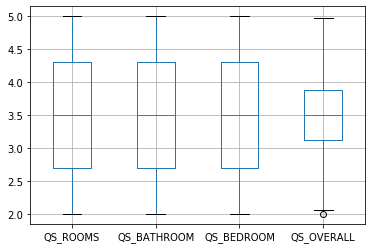

In [76]:
df.boxplot(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'])

In [77]:
df.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12131870.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


In [78]:
df.pivot_table(values='SALES_PRICE',index='BUILDTYPE',aggfunc='median')

,SALES_PRICE
BUILDTYPE,
Commercial,13356200
House,8985370
Others,9637260


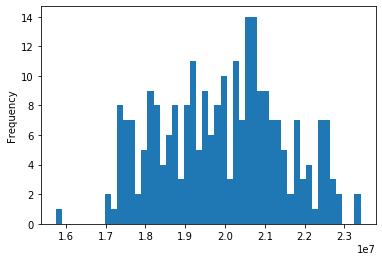

In [79]:
temp_df=df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Ana Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

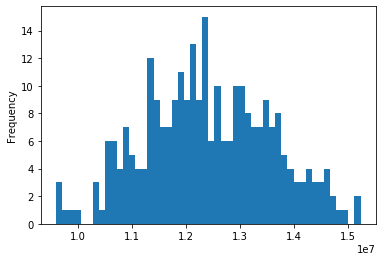

In [80]:
temp_df=df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Ana Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

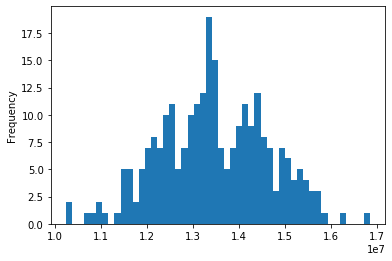

In [81]:
temp_df=df.loc[(df['BUILDTYPE']=='Others')&(df['AREA']=='Ana Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

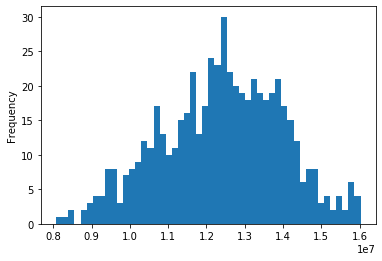

In [82]:
temp_chrom=df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Chrompet')]
temp_chrom['SALES_PRICE'].plot.hist(bins=50)

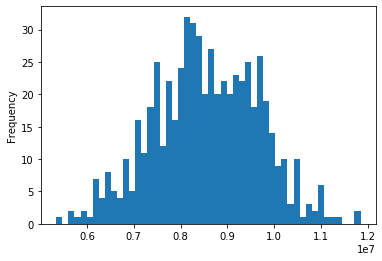

In [83]:
temp_chrom=df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Chrompet')]
temp_chrom['SALES_PRICE'].plot.hist(bins=50)

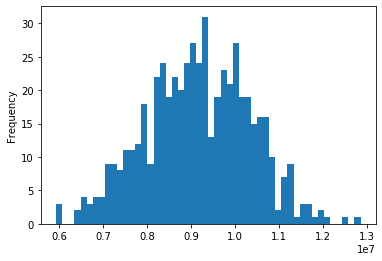

In [84]:
temp_chrom=df.loc[(df['BUILDTYPE']=='Others')&(df['AREA']=='Chrompet')]
temp_chrom['SALES_PRICE'].plot.hist(bins=50)

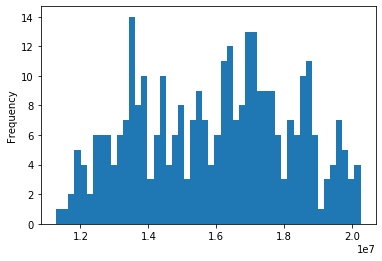

In [85]:
temp_KK=df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='KKNagar')]
temp_KK['SALES_PRICE'].plot.hist(bins=50)

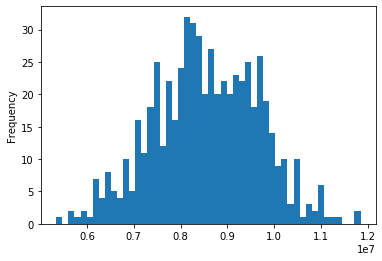

In [86]:
temp_chrom=df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Chrompet')]
temp_chrom['SALES_PRICE'].plot.hist(bins=50)

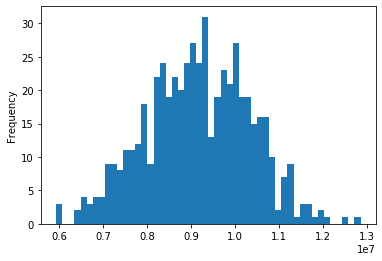

In [87]:
temp_chrom=df.loc[(df['BUILDTYPE']=='Others')&(df['AREA']=='Chrompet')]
temp_chrom['SALES_PRICE'].plot.hist(bins=50)

In [88]:
df.pivot_table(values='SALES_PRICE',index='BUILDTYPE',columns='PARK_FACIL',aggfunc='median')

PARK_FACIL,No,Yes
BUILDTYPE,,
Commercial,12692985,13920600
House,8514140,9468150
Others,9104645,10039405


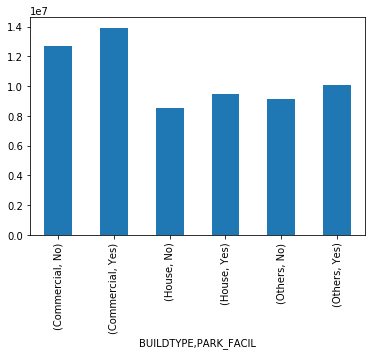

In [89]:
temp_dff=df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()
temp_dff.plot(kind='bar')

In [90]:
df.pivot_table(values='SALES_PRICE',index='AREA',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Ana Nagar,13727895
Chrompet,9606725
KKNagar,12146740
Karapakam,7284250
Karapakkam,7040500
TNagar,14049650
Velchery,10494410


In [91]:
check1=check.drop(['null count'],axis=1)

In [92]:
check1

,Unique count,d types
PRT_ID,7109,object
AREA,17,object
INT_SQFT,1699,int64
DIST_MAINROAD,201,int64
N_BEDROOM,4,float64
N_BATHROOM,2,float64
N_ROOM,5,int64
SALE_COND,9,object
PARK_FACIL,3,object
BUILDTYPE,5,object


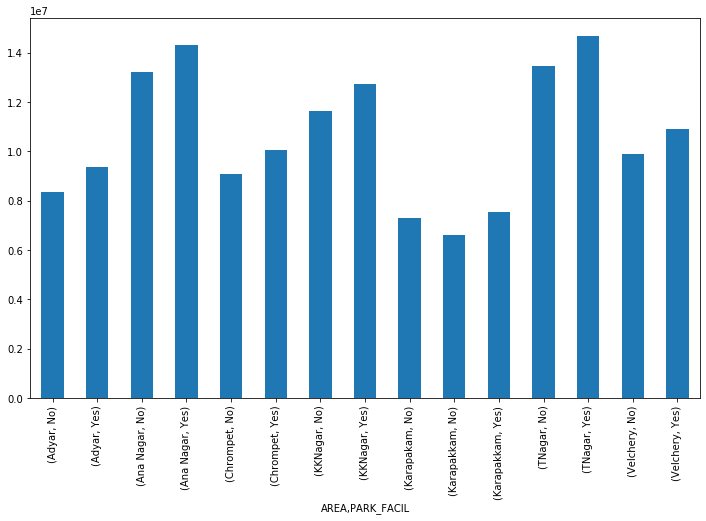

In [93]:
plt.figure(figsize=(12,7))
teemp=df.groupby(['AREA','PARK_FACIL']).SALES_PRICE.median()
teemp.plot(kind='bar')

Text(0, 0.5, 'SALES PRICE')

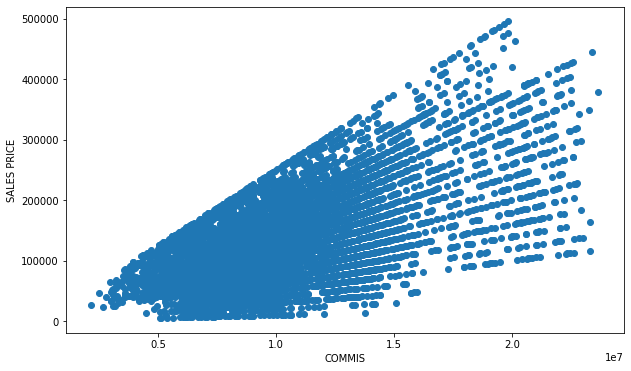

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(df['SALES_PRICE'],df['COMMIS'])
plt.xlabel('COMMIS')
plt.ylabel('SALES PRICE')

###  Now our data is clean and we have done all the exploration over the dataset

In [95]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Ana Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velchery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


### Creating dummy values using LabelEncoder

In [96]:
le=LE()
df.STREET=le.fit_transform(df.STREET)
df.AREA=le.fit_transform(df.AREA)
df.SALE_COND=le.fit_transform(df.SALE_COND)
df.BUILDTYPE=le.fit_transform(df.BUILDTYPE)
df.UTILITY_AVAIL=le.fit_transform(df.UTILITY_AVAIL)
df.MZZONE=le.fit_transform(df.MZZONE)
df.PARK_FACIL=le.fit_transform(df.PARK_FACIL)

In [97]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,5,1004,131,1,1,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,1,1986,26,2,1,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,0,909,70,1,1,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,7,1855,14,3,2,5,2,0,2,3,2,2,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,5,1226,84,1,1,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,74063,7406250


### Differentiating the Independent and Dependent Variables 

In [98]:
x=df.drop(['PRT_ID','SALES_PRICE'],axis=1)
y=df.SALES_PRICE

### Building up regression model and splitting our data using train_test_split

In [99]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [100]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lr.predict(x_test)

array([13217291.18799184, 15270493.56670921,  9994157.21325314, ...,
        6149530.32315728, 14066288.00138095,  8204490.25287954])

In [102]:
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)

In [103]:
msle_train=np.sqrt(mean_squared_log_error(y_train,pred_train))
msle_test=np.sqrt(mean_squared_log_error(y_test,pred_test))

In [104]:
print('mean_squared_log_error for train -->',msle_train)
print('mean_squared_log_error for test -->',msle_test)

mean_squared_log_error for train --> 0.17143618309871106
mean_squared_log_error for test --> 0.16818774205185932
